In [1]:
import os
import os.path as op
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import skimage.io
import skimage.filters
from skimage.filters import try_all_threshold
import matplotlib.image as mpimg
from scipy import ndimage as ndi
from skimage.transform import resize
import skimage.morphology
import skimage.feature
import math
from math import sqrt
from skimage.color import rgb2gray
from skimage import measure
import skan

Here we simply import the image (typically a .tif file type), split the 3 channels, and generate a max intensity projection for each.

(84, 512, 512)
uint16
[[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1c683810>


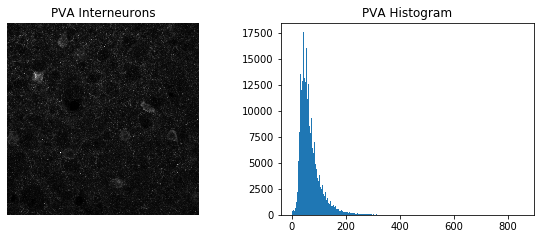

In [2]:
img = skimage.io.imread('slide_9_slice_2_60x_z_stack_2.tif')
print(img.shape)
print(img.dtype)
DAPI = img[0::3]
PNN = img[1::3]
PVA = img[2::3]

DAPI_MaxIP = np.max(DAPI,axis=0)
PNN_MaxIP = np.max(PNN,axis=0)
PVA_MaxIP = np.max(PVA,axis=0)

fig, ax = plt.subplots(3,2, figsize=(10, 12))
print(ax)

ax[0,0] = plt.subplot(1, 2, 1)
ax[0,1] = plt.subplot(1, 2, 2)
ax[1,0] = plt.subplot(2, 2, 1)
ax[1,1] = plt.subplot(2, 2, 2)
ax[2,0] = plt.subplot(3, 2, 1)
ax[2,1] = plt.subplot(3, 2, 2)


ax[0,0].imshow(DAPI_MaxIP, cmap=plt.cm.gray)
ax[0,0].set_title('DAPI')
ax[0,0].axis('off')

ax[0,1].hist(DAPI_MaxIP.ravel(), bins=256)
ax[0,1].set_title('DAPI Histogram')

ax[1,0].imshow(PNN_MaxIP, cmap=plt.cm.gray)
ax[1,0].set_title('PNN')
ax[1,0].axis('off')

ax[1,1].hist(PNN_MaxIP.ravel(), bins=256)
ax[1,1].set_title('PNN Histogram')

ax[2,0].imshow(PVA_MaxIP, cmap=plt.cm.gray)
ax[2,0].set_title('PVA Interneurons')
ax[2,0].axis('off')

ax[2,1].hist(PVA_MaxIP.ravel(), bins=256)
ax[2,1].set_title('PVA Histogram')

plt.show()


#DAPIplot = plt.imshow(1-DAPI_MaxIP, cmap='Greys')
#plt.show()
#plt.hist(DAPI_MaxIP.ravel(), bins=256)
#plt.ylim(0, 30000)
#plt.xlim(0, 3000)
#plt.show()
#PNNplot = plt.imshow(1-PNN_MaxIP, cmap='Greys')
#plt.show()
#plt.hist(PNN_MaxIP.ravel(), bins=256)
#plt.ylim(0, 30000)
#plt.xlim(0, 3000)
#plt.show()
#PVAplot = plt.imshow(1-PVA_MaxIP, cmap='Greys')
#plt.show()

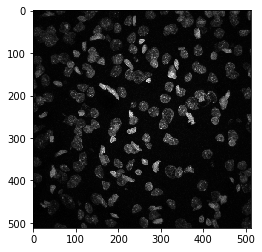

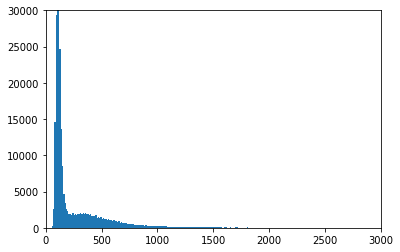

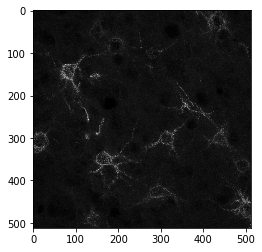

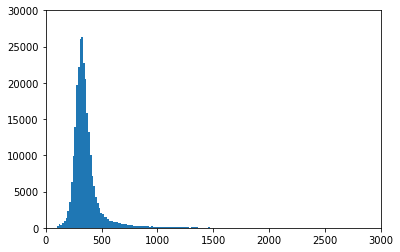

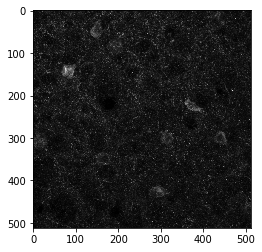

In [3]:
DAPI = img[0::3]
PNN = img[1::3]
PVA = img[2::3]

DAPI_MaxIP = np.max(DAPI,axis=0)
PNN_MaxIP = np.max(PNN,axis=0)
PVA_MaxIP = np.max(PVA,axis=0)


DAPIplot = plt.imshow(1-DAPI_MaxIP, cmap='Greys')
plt.show()
plt.hist(DAPI_MaxIP.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PNNplot = plt.imshow(1-PNN_MaxIP, cmap='Greys')
plt.show()
plt.hist(PNN_MaxIP.ravel(), bins=256)
plt.ylim(0, 30000)
plt.xlim(0, 3000)
plt.show()
PVAplot = plt.imshow(1-PVA_MaxIP, cmap='Greys')
plt.show()

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x1296 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f3bc090>,
       dtype=object))

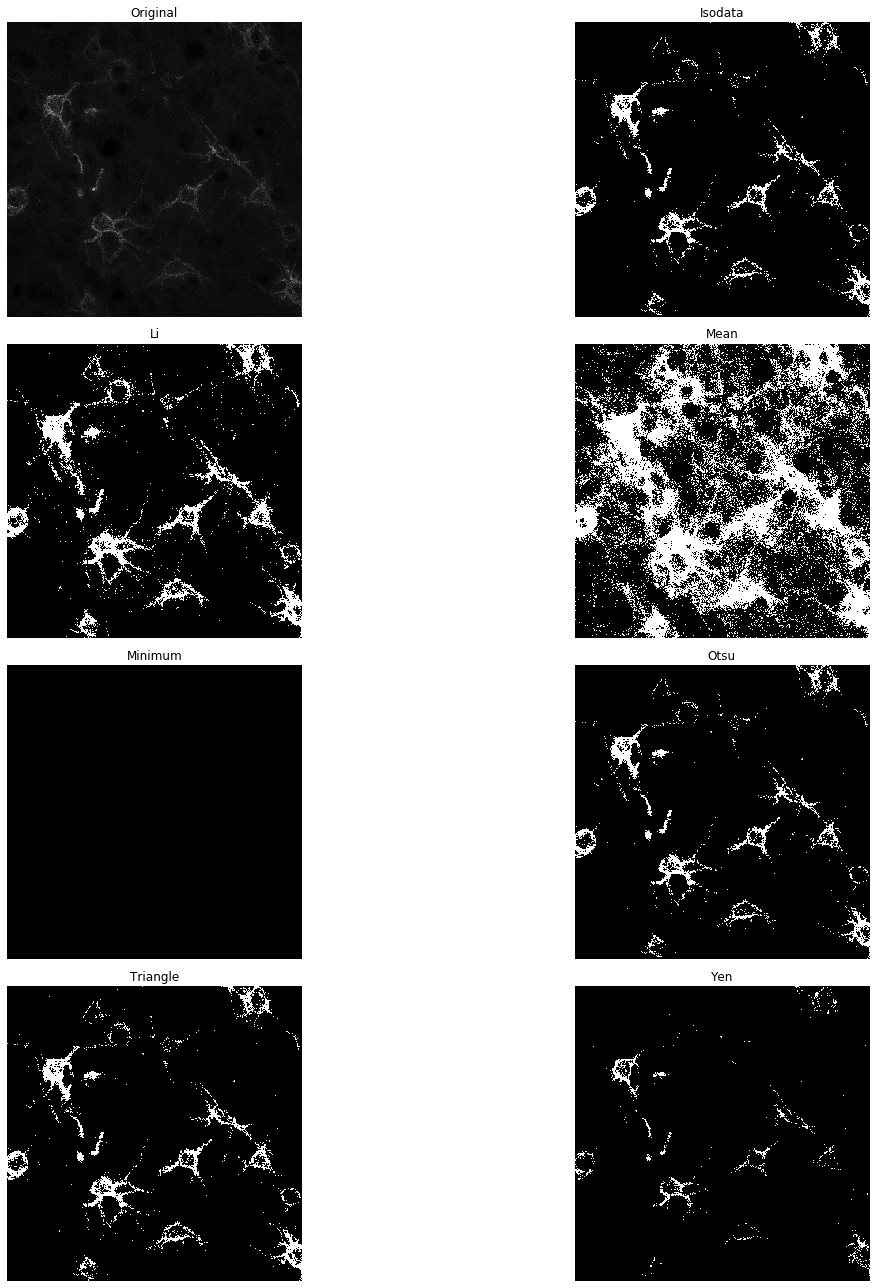

In [4]:
try_all_threshold(PNN_MaxIP, figsize=(20,18))

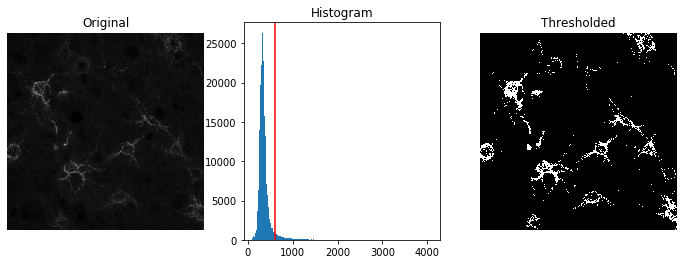

In [5]:
thresh = skimage.filters.threshold_otsu(PNN_MaxIP)
PNN_binary = PNN_MaxIP > thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 4))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(PNN_MaxIP, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(PNN_MaxIP.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(PNN_binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

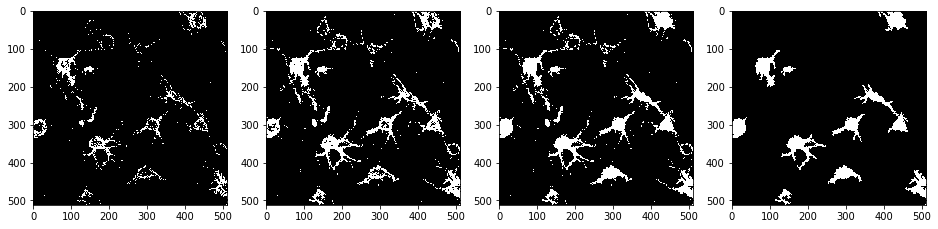

In [6]:
PNN_dilation = skimage.morphology.binary_dilation(PNN_binary)
PNN_filled_holes = ndi.binary_fill_holes(PNN_dilation)
PNN_clean = skimage.morphology.remove_small_objects(PNN_filled_holes, min_size=400)


fig, axes = plt.subplots(ncols=4, figsize=(16, 8))
ax = axes.ravel()
ax[0] = plt.subplot(1, 4, 1)
ax[1] = plt.subplot(1, 4, 2)
ax[2] = plt.subplot(1, 4, 3)
ax[3] = plt.subplot(1, 4, 4)
ax[0].imshow(PNN_binary, cmap=plt.cm.gray)
ax[1].imshow(PNN_dilation, cmap=plt.cm.gray)
ax[2].imshow(PNN_filled_holes, cmap=plt.cm.gray)
ax[3].imshow(PNN_clean, cmap=plt.cm.gray)
plt.show()

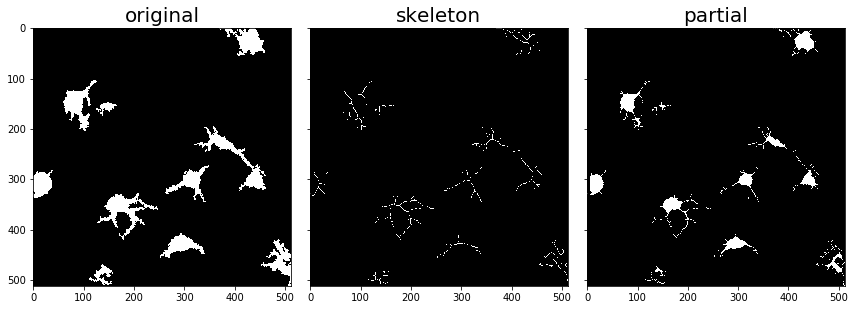

In [7]:
skeleton = skimage.morphology.skeletonize(PNN_clean)
partial_skel = skimage.morphology.thin(PNN_clean, max_iter=5)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 12), sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(PNN_clean, cmap=plt.cm.gray)
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].set_title('skeleton', fontsize=20)

ax[2].imshow(partial_skel, cmap=plt.cm.gray)
ax[2].set_title('partial', fontsize=20)

fig.tight_layout()
plt.show()

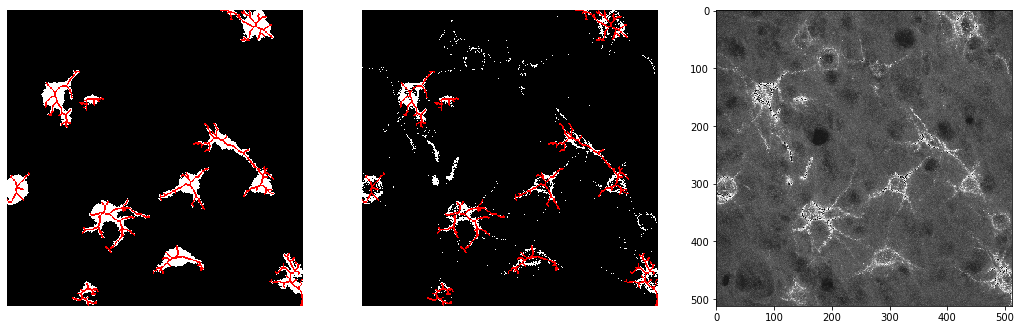

In [8]:
from skan import draw

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 18))
ax = axes.ravel()
draw.overlay_skeleton_2d(PNN_clean, skeleton, dilate=1, axes=ax[0])
draw.overlay_skeleton_2d(PNN_binary, skeleton, dilate=1, axes=ax[1])
ax[2] = plt.imshow(1-PNN_MaxIP*50, cmap='Greys')

In [9]:
from skan import csr
from skan import summarize

branch_data = csr.summarise(skeleton)
print(branch_data.shape)
branch_data

(231, 14)


,skeleton-id,node-id-0,node-id-1,branch-distance,branch-type,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,1,1,17,16.487395,1,0,370,3,385,0.0,370.000000,3.000000,385.333333,15.624056
1,1,15,20,4.164214,1,1,409,4,410,1.0,409.000000,4.750000,410.000000,3.881044
2,1,16,22,10.429778,1,1,419,11,419,1.0,419.000000,11.000000,419.750000,10.028086
3,1,17,21,15.623353,2,3,385,9,398,3.0,385.333333,9.333333,398.333333,14.460675
4,1,26,20,6.429778,1,3,405,4,410,3.0,405.000000,4.750000,410.000000,5.297405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,10,2197,560,2.134375,1,504,154,505,152,504.0,154.000000,505.666667,152.666667,2.134375
227,10,557,2221,6.828427,1,504,140,510,140,504.0,140.000000,510.000000,140.000000,6.000000
228,10,2215,560,1.885618,1,507,154,505,152,507.0,154.000000,505.666667,152.666667,1.885618
229,8,2222,569,2.699673,1,510,507,509,509,510.0,507.000000,509.666667,509.666667,2.687419


## The goal here is to write a script that will quantify the number of branches, total branch length, and average branch length for each skeleton in the dataframe

In [42]:
print(branch_data["skeleton-id"].max())
print(branch_data['branch-type'].max(), ",", branch_data['branch-type'].min())
print(len((branch_data)))
print(branch_data['branch-distance'][230])

10
2 , 1
231
2.414213562373095


In [43]:
skel_data = ["skeleton-id", "# of branches", "total branch length", 'avg branch length']
output_data = pd.DataFrame(columns = skel_data)

num_skel = max(branch_data['skeleton-id'])
tot_branch = len(branch_data)

for skels in range(1, num_skel+1):
    num_branch = 0
    tot_length = 0
    for branch in range(0, tot_branch):
        if branch_data['skeleton-id'][branch] == skels:
            num_branch = num_branch + 1
            tot_length = tot_length + branch_data['branch-distance'][branch]
    avg_length = tot_length/num_branch
    output_data.loc[skels] = [skels, num_branch, tot_length, avg_length]

In [44]:
output_data

,skeleton-id,# of branches,total branch length,avg branch length
1,1.0,30.0,319.759419,10.658647
2,2.0,22.0,283.923604,12.905618
3,3.0,14.0,87.542555,6.253040
4,4.0,38.0,447.217050,11.768870
5,5.0,15.0,228.036338,15.202423
6,6.0,7.0,125.806864,17.972409
7,7.0,36.0,441.371316,12.260314
8,8.0,32.0,298.951884,9.342246
9,9.0,16.0,197.638665,12.352417
10,10.0,21.0,148.340670,7.063841


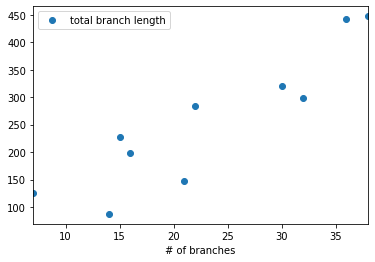

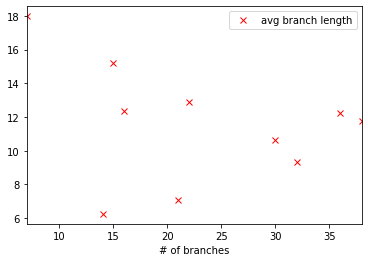

In [48]:
output_data.plot(x='# of branches', y='total branch length', style='o')
output_data.plot(x='# of branches', y='avg branch length', style='rx')

In [23]:
print(PNN_clean[0:5])
print(DAPI_MaxIP[0:5])
print(len(PNN_clean))

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
[[ 88  77  94 ... 338 154 129]
 [107  78  98 ... 491 219 168]
 [ 90  77  83 ... 524 333 186]
 [ 89 103 114 ... 562 466 280]
 [ 76  81  74 ... 652 506 404]]
512


In [30]:
filtered_DAPI = np.zeros(int(len(DAPI_MaxIP)),int(len(DAPI_MaxIP))
for ypixel in range(0,len(PNN_clean)):
    for xpixel in range(0,len(PNN_clean)):
        if PNN_clean[ypixel,xpixel] == True:
            filtered_DAPI[ypixel,xpixel] = DAPI_MaxIP[ypixel,xpixel]
        else:
            filtered_DAPI[ypixel,xpixel] = 0


SyntaxError: invalid syntax (<ipython-input-30-888897ec4515>, line 2)

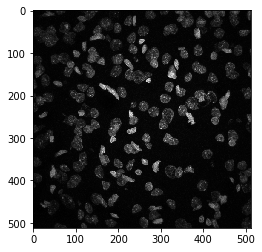

In [15]:

DAPIplot = plt.imshow(1-DAPI_MaxIP, cmap='Greys')
plt.show()